### Mann-Kendall trend test, MMK, Vogelsang test

Use this monthly rainfall data in Los Angeles available at the Bruinlearn (DJFLA.txt) to determine:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats 
from matplotlib.lines import Line2D
from scipy import stats
from tabulate import tabulate
from scipy.stats import norm, expon, gamma, lognorm
from scipy.optimize import curve_fit
from scipy.stats import norm, chi2
from pymannkendall import original_test
from pymannkendall import hamed_rao_modification_test
import statsmodels.api as sm
import pymannkendall as mk

/home/demched7/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_path = "/home/demched7/AOS219/DJFLArainfall.txt"
DJFLArainfall = np.loadtxt(data_path)

In [3]:
# Generate periods
periods = [f'Dec {1980+i} - Feb {1981+i}' for i in range(len(DJFLArainfall))]

# Create DataFrame
df = pd.DataFrame({'Mean Rainfall': DJFLArainfall, 'Period': periods})

# Round numbers to 2 decimal places
df['Mean Rainfall'] = df['Mean Rainfall'].round(2)

# Display DataFrame as a pretty table
table_str = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Add horizontal lines before and after the table
table_with_lines = '-' * len(table_str.split('\n')[0]) + '\n' + table_str + '\n' + '-' * len(table_str.split('\n')[0])

# Print the table with horizontal lines
print(table_with_lines)

---------------------------------------
+---------------+---------------------+
| Mean Rainfall |       Period        |
+---------------+---------------------+
|     3.92      | Dec 1980 - Feb 1981 |
|     3.66      | Dec 1981 - Feb 1982 |
|     9.26      | Dec 1982 - Feb 1983 |
|      2.1      | Dec 1983 - Feb 1984 |
|     5.49      | Dec 1984 - Feb 1985 |
|     5.05      | Dec 1985 - Feb 1986 |
|     2.77      | Dec 1986 - Feb 1987 |
|     3.61      | Dec 1987 - Feb 1988 |
|     3.63      | Dec 1988 - Feb 1989 |
|     2.53      | Dec 1989 - Feb 1990 |
|     2.83      | Dec 1990 - Feb 1991 |
|     6.16      | Dec 1991 - Feb 1992 |
|     12.99     | Dec 1992 - Feb 1993 |
|     4.71      | Dec 1993 - Feb 1994 |
|      7.4      | Dec 1994 - Feb 1995 |
|     5.86      | Dec 1995 - Feb 1996 |
|     5.45      | Dec 1996 - Feb 1997 |
|     14.45     | Dec 1997 - Feb 1998 |
|     2.42      | Dec 1998 - Feb 1999 |
|     3.03      | Dec 1999 - Feb 2000 |
|     6.91      | Dec 2000 - Feb 2001 |


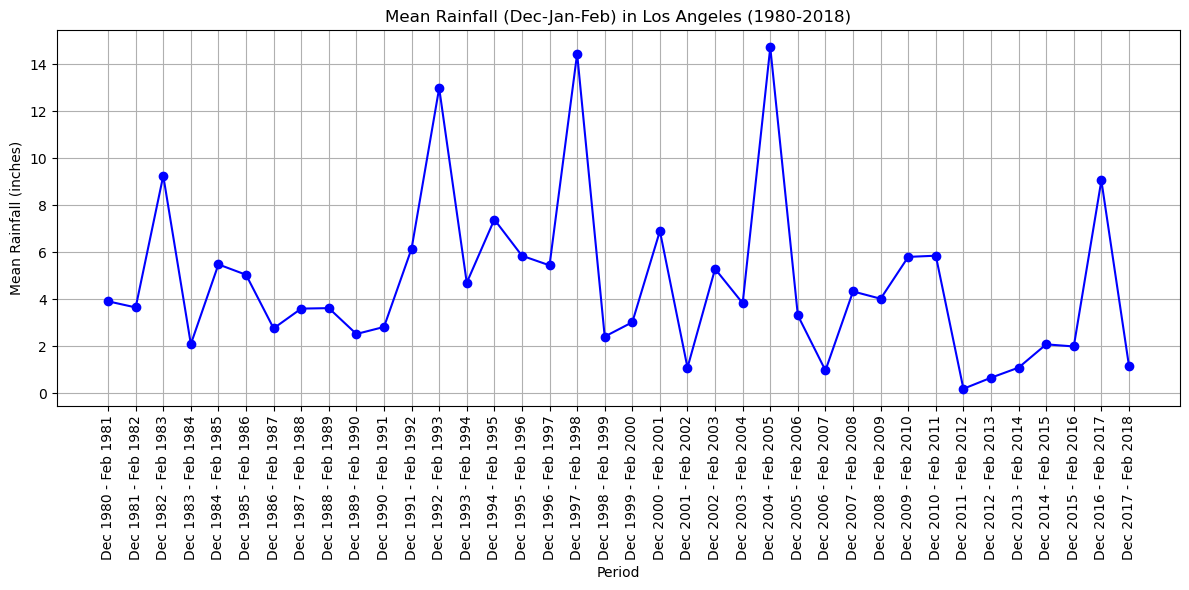

In [4]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(periods, DJFLArainfall, marker='o', color='b', linestyle='-')
plt.title('Mean Rainfall (Dec-Jan-Feb) in Los Angeles (1980-2018)')
plt.xlabel('Period')
plt.ylabel('Mean Rainfall (inches)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 1. Using DJF rainfall in Los Angeles to determine whether there is a trend, if so, is it positive or negative, over the period of 1980-2018 using Mann-Kendall trend test for 95% confidence (or a=0.05).

In [5]:
## Number of data points
n = len(DJFLArainfall)

# Variance of S without correction for ties
var_s = (n * (n - 1) * (2 * n + 5)) / 18

# Perform the Mann-Kendall test
result = original_test(DJFLArainfall)

# Output the S statistic, Z statistic, p-value, and variance of S
print(f"S statistic: {result.s}, Z statistic: {result.z}, P-value: {result.p}")
print(f"Variance of S: {var_s}")
print(f"Trend: {'Increasing' if result.trend == 'increasing' else 'Decreasing' if result.trend == 'decreasing' else 'No trend'}")

# Calculate the critical value for 95% confidence (two-tailed)
z_critical = norm.ppf(0.975)  # for a two-tailed test at alpha=0.05

print(f"Critical Z value: {z_critical}")

# Determine if we can reject the null hypothesis
if abs(result.z) > z_critical:
    print("There is a significant trend in the rainfall data.")
else:
    print("There is no significant trend in the rainfall data.")

S statistic: -108.0, Z statistic: -1.3453001291753746, P-value: 0.17852833187966866
Variance of S: 6327.0
Trend: No trend
Critical Z value: 1.959963984540054
There is no significant trend in the rainfall data.


In [6]:
############################################### do not use ########################################################
# Number of data points
n = len(DJFLArainfall)

# Rank data points
ranks = np.argsort(DJFLArainfall) + 1  # 1-based ranks
autocorrelations = [np.corrcoef(ranks[:-k], ranks[k:])[0, 1] for k in range(1, n)]

# Effective sample size considering autocorrelation
n_star = n / (1 + 2 * sum((1 - k/n) * autocorrelations[k-1] for k in range(1, n)))

# Corrected variance of S
var_s_corrected = (n_star * (n_star - 1) * (2 * n_star + 5)) / 18

# Perform the Mann-Kendall test
result = original_test(DJFLArainfall)

# Output S, Z, and p-value
print(f"S statistic: {result.s}, Z statistic: {result.z}, P-value: {result.p}")
print(f"Corrected Variance of S: {var_s_corrected}")
print(f"Trend: {'Increasing' if result.trend == 'increasing' else 'Decreasing' if result.trend == 'decreasing' else 'No trend'}")

# Critical Z value
z_critical = norm.ppf(0.975)

print(f"Critical Z value: {z_critical}")

# Determine if null hypothesis can be rejected
if abs(result.z) > z_critical:
    print("There is a significant trend in the rainfall data.")
else:
    print("There is no significant trend in the rainfall data.")

S statistic: -108.0, Z statistic: -1.3453001291753746, P-value: 0.17852833187966866
Corrected Variance of S: nan
Trend: No trend
Critical Z value: 1.959963984540054
There is no significant trend in the rainfall data.


/home/demched7/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/demched7/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/demched7/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### Question 2. Using the same DJF rainfall in Los Angeles to determine whether there is a trend in the rainfall data over the period of 1980-2018 using modified Mann-Kendall trend tests for 95% confidence (or a=0.05). If so, is the trend positive or negative? (R code is provided at the CCLE course website)

In [7]:
# Perform the Yue-Wang modified Mann-Kendall test
result = mk.yue_wang_modification_test(DJFLArainfall)

print(result)

# Output S, Z, and p-value
print(f"S statistic: {result.s}, Z statistic: {result.z}, P-value: {result.p}")
print(f"Trend: {'Increasing' if result.trend == 'increasing' else 'Decreasing' if result.trend == 'decreasing' else 'No trend'}")

# Critical Z value
z_critical = norm.ppf(0.975)

print(f"Critical Z value: {z_critical}")

# Conclusion
if abs(result.z) > z_critical:
    print("There is a significant trend in the rainfall data.")
else:
    print("There is no significant trend in the rainfall data.")

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=0.00392133017123486, z=-2.8844218952532206, Tau=-0.15362731152204837, s=-108.0, var_s=1376.0999790100525, slope=-0.056296296296296296, intercept=4.921481481481481)
S statistic: -108.0, Z statistic: -2.8844218952532206, P-value: 0.00392133017123486
Trend: Decreasing
Critical Z value: 1.959963984540054
There is a significant trend in the rainfall data.


### Question 3. Applying the Vogelsang trend test to the same data as in question 1 to determine whether there is a trend at 95% significance. (R code is provided at the Bruinlearn AOS 219 website, in Week-4 Module)

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.sandwich_covariance import cov_hac
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.sandwich_covariance import cov_hac
from scipy.stats import norm

# DJF Rainfall data
DJFLArainfall = np.array([
    3.92, 3.66, 9.26, 2.1, 5.49, 5.05, 2.77, 3.61, 3.63, 2.53, 2.83, 6.16,
    12.99, 4.71, 7.4, 5.86, 5.45, 14.45, 2.42, 3.03, 6.91, 1.1, 5.3, 3.84,
    14.72, 3.32, 0.98, 4.34, 4.03, 5.81, 5.86, 0.2, 0.67, 1.1, 2.09, 2.0,
    9.06, 1.18
])

# Create a time variable
years = np.arange(1980, 1980 + len(DJFLArainfall))

# Data frame for modeling
df = pd.DataFrame({"Years": years, "Rainfall": DJFLArainfall})

# Add a constant for OLS regression
df["Constant"] = 1

# OLS Regression model
model = sm.OLS(df["Rainfall"], df[["Constant", "Years"]])
result = model.fit()

# HAC correction
hac_cov = cov_hac(result)

# Compute the robust standard errors
robust_se = np.sqrt(np.diag(hac_cov))

# Z-statistic
z_value = result.params[1] / robust_se[1]

# Critical Z value for a 95% confidence level
z_critical = norm.ppf(0.975)

# Output regression results
print(f"Z-value: {z_value}, Critical Z-value: {z_critical}")
print(f"Slope: {result.params[1]}")

# Conclusion
if abs(z_value) > z_critical:
    trend = "Increasing" if z_value > 0 else "Decreasing"
    print(f"There is a significant {trend} trend in the rainfall data.")
else:
    print("There is no significant trend in the rainfall data.")


Z-value: -1.272575358691847, Critical Z-value: 1.959963984540054
Slope: -0.05289528394791937
There is no significant trend in the rainfall data.


/tmp/ipykernel_244485/3368086759.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_value = result.params[1] / robust_se[1]
/tmp/ipykernel_244485/3368086759.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Slope: {result.params[1]}")


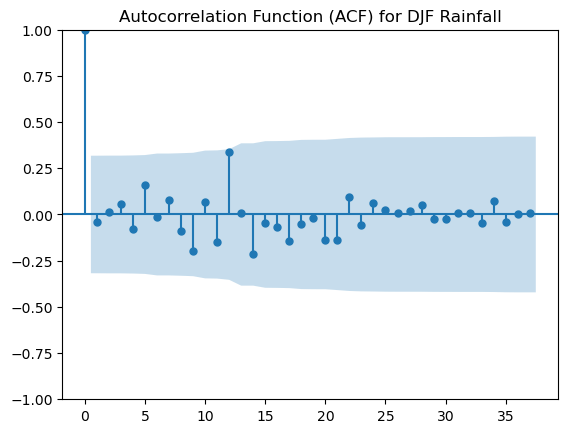

Autocorrelation values: [ 1.00000000e+00 -4.16014492e-02  1.60628606e-02  5.56459395e-02
 -8.02170365e-02  1.62216254e-01 -1.44615091e-02  7.64422064e-02
 -8.75410829e-02 -1.98904832e-01  6.51756429e-02 -1.51415500e-01
  3.39632449e-01  6.76217844e-03 -2.11435351e-01 -4.77431969e-02
 -6.72739419e-02 -1.43724835e-01 -5.38420324e-02 -2.07837524e-02
 -1.37360699e-01 -1.39921146e-01  9.48869786e-02 -5.52826064e-02
  6.41635422e-02  2.54882862e-02  9.86295521e-03  1.86557403e-02
  5.10837976e-02 -2.40654542e-02 -2.66268383e-02  1.04741451e-02
  9.93392976e-03 -4.48847505e-02  7.38777854e-02 -4.01832422e-02
  6.38018723e-04  6.26654702e-03]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# Autocorrelation computation
acf_vals = acf(DJFLArainfall, nlags=len(DJFLArainfall)-1)

# Plotting the autocorrelation function
plot_acf(DJFLArainfall, lags=len(DJFLArainfall)-1)
plt.title("Autocorrelation Function (ACF) for DJF Rainfall")
plt.show()

# Display autocorrelation values
print("Autocorrelation values:", acf_vals)
